# Análisis de Admisiones para programa posgrado

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [240]:
df=pd.read_csv("Admission_Predict.csv")
df=df[list(df.columns[1:])]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Análisis inicial

### GRE Score

In [241]:
df['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

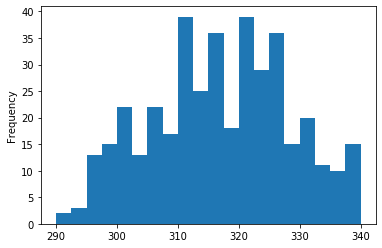

In [242]:
df["GRE Score"].plot.hist(bins=20)

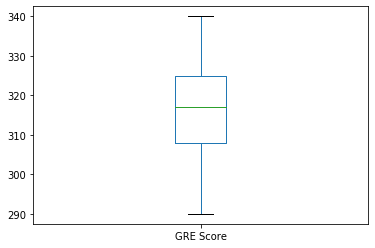

In [243]:
df["GRE Score"].plot.box()

### TOEFL Score	

In [244]:
df['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

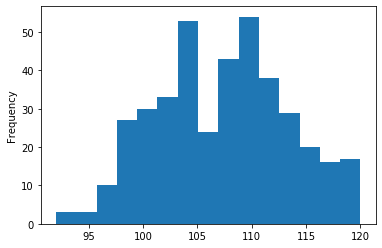

In [245]:
df['TOEFL Score'].plot.hist(bins=15)

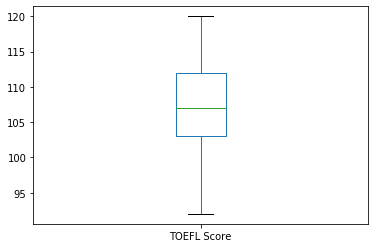

In [246]:
df['TOEFL Score'].plot.box()

### University Rating

In [247]:
df['University Rating'].describe()

count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64

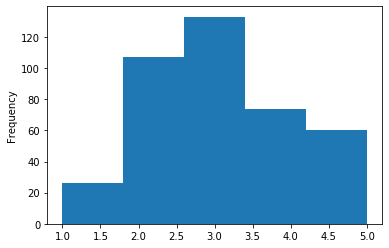

In [248]:
df['University Rating'].plot.hist(bins=5)

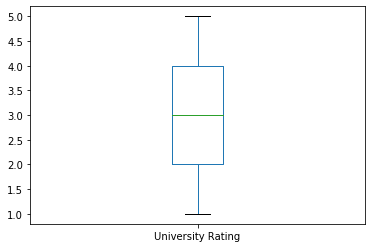

In [249]:
df['University Rating'].plot.box()

### SOP

In [250]:
df['SOP'].describe()

count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

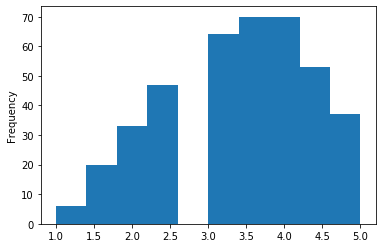

In [251]:
df['SOP'].plot.hist(bins=10)

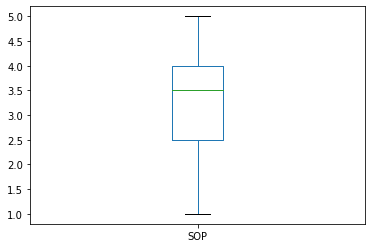

In [252]:
df['SOP'].plot.box()

### Letter Of Rec

In [253]:
df['LOR '].describe()

count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR , dtype: float64

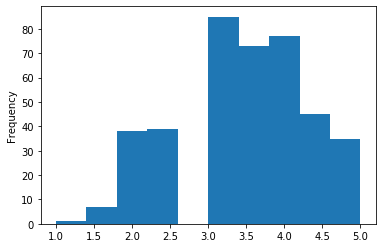

In [254]:
df['LOR '].plot.hist(bins=10)

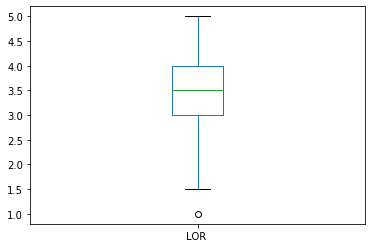

In [255]:
df['LOR '].plot.box()

### CGPA

In [256]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

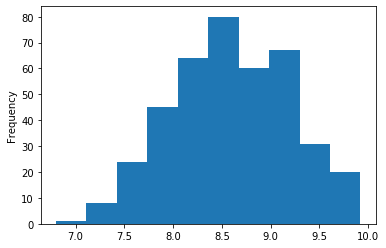

In [257]:
df['CGPA'].plot.hist(bins=10)

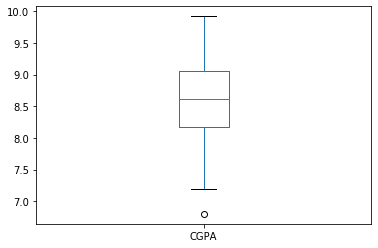

In [258]:
df['CGPA'].plot.box()

### Research

In [259]:
df['Research'].describe()

count    400.000000
mean       0.547500
std        0.498362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

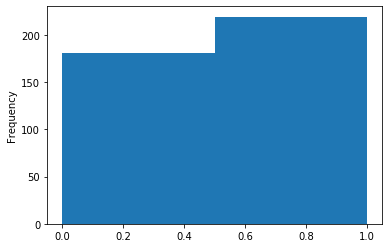

In [260]:
df['Research'].plot.hist(bins=2)

## Preprocesamiento

### Verificar que no tenga NaNs

In [261]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Normalizar Datos
- GRE Score
    - [[0,340]]
- TOEFL Score
    - [[0,120]]
- University Rating
    - {0,1,2,3,4,5}
- SOP
    - [[0,5]]
- LoR
    - [[0,5]]
- CGPA
    - [[0,10]]
- Research
    - Ya está normalizado 

In [262]:
df['GRE Score']/=340
df['TOEFL Score']/=120
df['University Rating']/=5
df['SOP']/=5
df['LOR ']/=5
df['CGPA']/=10

In [263]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.931787,0.895083,0.617500,0.680000,0.690500,0.859892,0.547500,0.724350
std,0.033746,0.050579,0.228746,0.201374,0.179696,0.059632,0.498362,0.142609
min,0.852941,0.766667,0.200000,0.200000,0.200000,0.680000,0.000000,0.340000
25%,0.905882,0.858333,0.400000,0.500000,0.600000,0.817000,0.000000,0.640000
50%,0.932353,0.891667,0.600000,0.700000,0.700000,0.861000,1.000000,0.730000
75%,0.955882,0.933333,0.800000,0.800000,0.800000,0.906250,1.000000,0.830000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.992000,1.000000,0.970000


In [264]:
df['Status']=df['Chance of Admit '].map(lambda x : 'Pasa' if x>df['Chance of Admit '].mean() else 'No Pasa')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Status
0,0.991176,0.983333,0.8,0.9,0.9,0.965,1,0.92,Pasa
1,0.952941,0.891667,0.8,0.8,0.9,0.887,1,0.76,Pasa
2,0.929412,0.866667,0.6,0.6,0.7,0.800,1,0.72,No Pasa
3,0.947059,0.916667,0.6,0.7,0.5,0.867,1,0.80,Pasa
4,0.923529,0.858333,0.4,0.4,0.6,0.821,0,0.65,No Pasa


## Matriz de Corelación

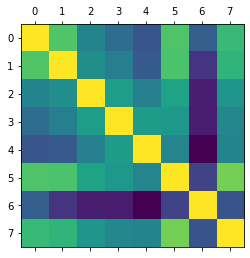

In [265]:
plt.matshow(df[list(df.columns)[:-1]].corr())
plt.show()

In [266]:
df[list(df.columns)[:-1]].corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [267]:
corrFeatures=df[list(df.columns)[:-1]].corr().sort_values(by='Chance of Admit ',ascending=False)

In [268]:
corrFeatures['Chance of Admit ']

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

## Generar Modelos

In [269]:
X_train,X_test,Y_train,Y_test=train_test_split(df[list(df.columns[:-2])],df['Status'],test_size=0.2,random_state=1)

### Modelo Logaritmico de clasificación pasa o no

In [270]:
CLF=LogisticRegressionCV(cv=150,random_state=0,n_jobs=6,max_iter=200,solver='liblinear').fit(X_train,Y_train)
CLF.score(X_test,Y_test)

0.9

In [271]:
for v,c in zip(X_train.columns,CLF.coef_[0]):
    print(v,": ",c)

GRE Score :  15.556372008627218
TOEFL Score :  4.885932349150055
University Rating :  2.2411991809563974
SOP :  1.5178665830471252
LOR  :  1.3872428574700082
CGPA :  27.99905981254577
Research :  1.2451077523693277


In [272]:
X_test.iloc[0]

GRE Score            0.917647
TOEFL Score          0.858333
University Rating    0.600000
SOP                  0.700000
LOR                  0.800000
CGPA                 0.878000
Research             0.000000
Name: 398, dtype: float64

In [273]:
Y_test.iloc[0]

'No Pasa'

In [274]:
CLF.predict([X_test.iloc[0]])

array(['No Pasa'], dtype=object)

### Modelo de predicción con Random Forest

Primeramente se obtiene el modelo y se ajustan los datos de entrenamiento al modelo

In [275]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [276]:
forest.score(X_test, Y_test)

0.8625

In [277]:
X_test.iloc[1]

GRE Score            0.882353
TOEFL Score          0.833333
University Rating    0.600000
SOP                  0.400000
LOR                  0.600000
CGPA                 0.866000
Research             1.000000
Name: 125, dtype: float64

In [278]:
Y_test.iloc[1]

'No Pasa'

In [238]:
forest.predict([X_test.iloc[1]])

array(['No Pasa'], dtype=object)

### Modelo de predicción con SVM

In [281]:
from sklearn import svm
svm_clf= svm.SVC(gamma="auto")
svm_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [282]:
svm_clf.score(X_test, Y_test)

0.7625

In [283]:
X_test.iloc[1]

GRE Score            0.882353
TOEFL Score          0.833333
University Rating    0.600000
SOP                  0.400000
LOR                  0.600000
CGPA                 0.866000
Research             1.000000
Name: 125, dtype: float64

In [286]:
Y_test.iloc[0]

'No Pasa'

In [285]:
svm_clf.predict(np.array([X_test.iloc[0]]))

array(['No Pasa'], dtype=object)

## Prueba con usuarios

Definimos una función para pre-procesar los datos ingresados por el usuario

In [287]:
def preprocesarDatos(GRE, TOEFL, rating, SOP, LOR, CGPA, research):
    TOEFL/=120
    rating/=5
    CGPA = (CGPA*10.0/5.0)/10.0
    LOR /=5
    SOP /=5
    GRE/=340
    return GRE, TOEFL, rating, SOP, CGPA, research

Se le pide al usuario la información para poder calcular si pasaría o no a la Universidad, Se crea el vector y se predice con el mejor modelo.

In [299]:
GRE = float(input("Ingrese cuanto estima obtener en el examen GRE"))
TOEFL = float(input("Ingrese su puntaje del examen TOEFL. Si no tiene un examen, ingrese 0"))
rating = float(input("Ingrese el rating de la universidad a la que espera pasar. Ingrese un número del 0 al 5"))
SOP = float(input("Ingrese el puntaje de su motivación. Ingrese un número del 0 al 5"))
LOR = float(input("Ingrese el puntaje de su carta de recomendación. Ingrese un número del 0 al 5"))
CGPA = float(input("Ingrese su promedio actual"))
research = float(input("Ingrese 1 si ha realizado investigación. De lo contrario ingrese 0"))
vector = np.array([[GRE, TOEFL,rating, SOP, LOR, CGPA, research]])
pred = CLF.predict(vector)
if pred[0] =="Pasa":
    print("Felicidades, usted tiene probabilidades de pasar a la universidad")
else:
    print("Lamentamos que actualmente tu probabilidad de pasar a la universidad especificada es baja.\n No te desanimes, sigue esforzandote por tus sueños e intenta nuevamente")

Felicidades, usted tiene probabilidades de pasar a la universidad
